In [1]:
import pygsti
from pygsti.construction import std1Q_XYI
import pickle
import sys

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import time

In [5]:
resultsD = {}

In [6]:
#keyList = [('2014_04_17-compensatedTraining'),('2014_12_02-GSTCompensatedDrift_randomized_condensed'),
#           ('2015_02_09-GSTCompensatedDrift_condensed'),('2015_03_02-GST_condensed'),('2015_03_19-GSTBest_condensed'),
#           ('2015_03_30-GST_BB1_XYXY_8192_condensed')]

keyList = [('2014_04_17-compensatedTraining'),('2014_12_02-GSTCompensatedDrift_randomized_condensed'),
           ('2015_02_09-GSTCompensatedDrift_condensed'),('2015_03_02-GST_condensed'),
           ('2015_03_30-GST_BB1_XYXY_8192_condensed')]

In [7]:
#This may take up to an hour or two to run.
for key in keyList:
    resultsD[key] = pickle.load(open('../ComputedObjects/'+key+'.pkl','r'))
    resultsD[key].confidence_level = 95
    resultsD[key].create_brief_report_pdf(confidenceLevel=95)

    
--- Hessian Projector Optimization for gate CIs (L-BFGS-B) ---
   22s           0.0045506432
   30s           0.0044392753
   39s           0.0044328192
   47s           0.0044309081
   55s           0.0044277632
   72s           0.0044273884
  The resulting min sqrt(sum(gateCIs**2)): 0.00442739



ERROR: pdflatex returned code 1 Check 2014_04_17-compensatedTraining.log to see details.


    
--- Hessian Projector Optimization for gate CIs (L-BFGS-B) ---
  108s           0.0018193837
  116s           0.0016715077
  125s           0.0016551242
  134s           0.0016531255
  142s           0.0016468899
  151s           0.0016419072
  168s           0.0016405503
  176s           0.0016399042
  The resulting min sqrt(sum(gateCIs**2)): 0.0016399



ERROR: pdflatex returned code 1 Check 2014_12_02-GSTCompensatedDrift_randomized_condensed.log to see details.


    
--- Hessian Projector Optimization for gate CIs (L-BFGS-B) ---
  215s           0.0008476560
  224s           0.0005972243
  232s           0.0005220805
  241s           0.0005137251
  250s           0.0005055650
  258s           0.0004941912
  267s           0.0004858549
  275s           0.0004791839
  284s           0.0004767499
  292s           0.0004766424
  The resulting min sqrt(sum(gateCIs**2)): 0.000476642



ERROR: pdflatex returned code 1 Check 2015_02_09-GSTCompensatedDrift_condensed.log to see details.


    
--- Hessian Projector Optimization for gate CIs (L-BFGS-B) ---
  377s           0.0010754143
  385s           0.0006301573
  394s           0.0004971921
  403s           0.0004752743
  411s           0.0004591976
  419s           0.0004460136
  428s           0.0004391255
  437s           0.0004075267
  445s           0.0003971107
  462s           0.0003940109
  471s           0.0003932727
  The resulting min sqrt(sum(gateCIs**2)): 0.000393273



ERROR: pdflatex returned code 1 Check 2015_03_02-GST_condensed.log to see details.


    
--- Hessian Projector Optimization for gate CIs (L-BFGS-B) ---
 1599s           0.0015961234
 1608s           0.0007618351
 1617s           0.0005474034
 1634s           0.0004430106
 1651s           0.0003930114
 1660s           0.0003740509
 1668s           0.0002880956
 1677s           0.0002047055
 1694s           0.0001845021
 1703s           0.0001533639
 1711s           0.0001481242
 1720s           0.0001464587
 1728s           0.0001444728
 1737s           0.0001423815
 1746s           0.0001397967
 1754s           0.0001381713
 1763s           0.0001374071
  The resulting min sqrt(sum(gateCIs**2)): 0.000137407



ERROR: pdflatex returned code 1 Check 2015_03_30-GST_BB1_XYXY_8192_condensed.log to see details.


In [8]:
#Compute (with error bars) the process infidelity and diamond norm
#for each data set.  This may take some time, particularly for the last data set.
derived_tablesD = {}
start = time.time()
for key in keyList:
    print key
    sys.stdout.flush()
    derived_tablesD[key] = resultsD[key].tables['bestGatesetVsTargetTable']
end = time.time()
print "Took", end-start, " seconds to compute derived gate quantities."

2014_04_17-compensatedTraining
2014_12_02-GSTCompensatedDrift_randomized_condensed
2015_02_09-GSTCompensatedDrift_condensed
2015_03_02-GST_condensed
2015_03_30-GST_BB1_XYXY_8192_condensed
Took 0.0077428817749  seconds to compute derived gate quantities.


In [9]:
#Compute the log-likelihood scores for each dataset,
#and in turn the amount of Markovianity violation.
#This too may take some time, particularly for the last data set.

logL_tablesD = {}
start = time.time()
for key in keyList:
    print key
    sys.stdout.flush()
    logL_tablesD[key] = resultsD[key].tables['logLProgressTable']
end = time.time()
print "Took", end-start, " seconds to compute log-likelihood tables."

2014_04_17-compensatedTraining
2014_12_02-GSTCompensatedDrift_randomized_condensed
2015_02_09-GSTCompensatedDrift_condensed
2015_03_02-GST_condensed
2015_03_30-GST_BB1_XYXY_8192_condensed
Took 1115.04241896  seconds to compute log-likelihood tables.


In [10]:
InfidelityXList = []
InfidelityErrorXList = []
InfidelityYList = []
InfidelityErrorYList = []
InfidelityIList = []
InfidelityErrorIList = []

DiamondXList = []
DiamondErrorXList = []
DiamondYList = []
DiamondErrorYList = []
DiamondIList = []
DiamondErrorIList = []

sigmaList = []

In [11]:
for key in keyList:
    InfidelityIList.append(derived_tablesD[key]['Gi']['Process|Infidelity'][0][0,0])
    InfidelityErrorIList.append(derived_tablesD[key]['Gi']['Process|Infidelity'][1][0,0])
    
    InfidelityXList.append(derived_tablesD[key]['Gx']['Process|Infidelity'][0][0,0])
    InfidelityErrorXList.append(derived_tablesD[key]['Gx']['Process|Infidelity'][1][0,0])

    InfidelityYList.append(derived_tablesD[key]['Gy']['Process|Infidelity'][0][0,0])
    InfidelityErrorYList.append(derived_tablesD[key]['Gy']['Process|Infidelity'][1][0,0])
    
    
    DiamondIList.append(derived_tablesD[key]['Gi']['1/2 Diamond-Norm'][0]*2)
    DiamondErrorIList.append(derived_tablesD[key]['Gi']['1/2 Diamond-Norm'][1])
    
    DiamondXList.append(derived_tablesD[key]['Gx']['1/2 Diamond-Norm'][0]*2)
    DiamondErrorXList.append(derived_tablesD[key]['Gx']['1/2 Diamond-Norm'][1])

    DiamondYList.append(derived_tablesD[key]['Gy']['1/2 Diamond-Norm'][0]*2)
    DiamondErrorYList.append(derived_tablesD[key]['Gy']['1/2 Diamond-Norm'][1])

#    Lkey = logL_tablesD[key].keys()[-1]
#    print key, Lkey
#    TwoDeltaLogL_less_k = logL_tablesD[key][Lkey]['2*Delta(log L)-k']
#    root_two_k = logL_tablesD[key][Lkey]['sqrt{2k}']
#    sigmaList.append(TwoDeltaLogL_less_k / root_two_k)

In [12]:
for key in keyList:
    Lkey = logL_tablesD[key].keys()[-1]
    print key, Lkey
    TwoDeltaLogL_less_k = logL_tablesD[key][Lkey]['2*Delta(log L)-k']
    root_two_k = logL_tablesD[key][Lkey]['sqrt{2k}']
    sigmaList.append(TwoDeltaLogL_less_k / root_two_k)

2014_04_17-compensatedTraining 256
2014_12_02-GSTCompensatedDrift_randomized_condensed 512
2015_02_09-GSTCompensatedDrift_condensed 512
2015_03_02-GST_condensed 2048
2015_03_30-GST_BB1_XYXY_8192_condensed 8192


In [13]:
#Actual plots for paper made with DataGraph.

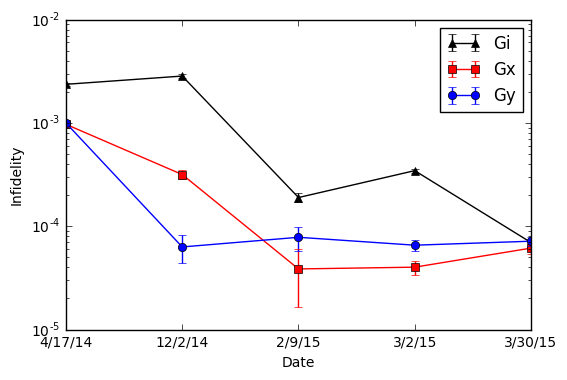

In [14]:
plt.errorbar(range(5),InfidelityIList,InfidelityErrorIList,linestyle='-',marker='^',label='Gi',color='k')#,'-o',label='Gi')
plt.errorbar(range(5),InfidelityXList,InfidelityErrorXList,linestyle='-',marker='s',label='Gx',color='r')
plt.errorbar(range(5),InfidelityYList,InfidelityErrorYList,linestyle='-',marker='o',label='Gy',color='b')
plt.yscale('log')
plt.ylabel('Infidelity')
plt.xlabel('Date')
plt.xticks(range(5),['4/17/14','12/2/14','2/9/15','3/2/15','3/30/15'])
plt.legend()
plt.savefig('../Figures/Fig2a.pdf')

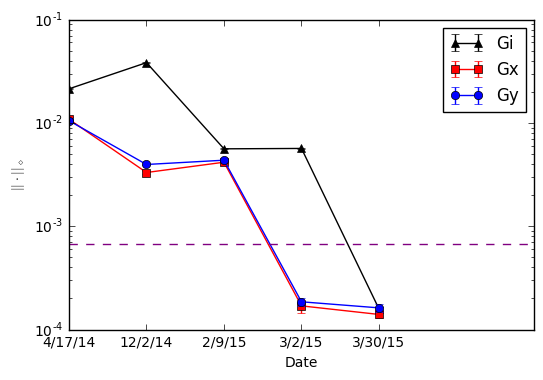

In [15]:
plt.errorbar(range(5),DiamondIList,np.array(DiamondErrorIList),linestyle='-',marker='^',label='Gi',color='k')#,'-o',label='Gi')
plt.errorbar(range(5),DiamondXList,np.array(DiamondErrorXList),linestyle='-',marker='s',label='Gx',color='r')
plt.errorbar(range(5),DiamondYList,np.array(DiamondErrorYList),linestyle='-',marker='o',label='Gy',color='b')
plt.axhline(6.7e-4,linestyle='--',color='purple')#Fault-tolerance threshold 
plt.yscale('log')
plt.ylabel(r'$||\cdot||_\diamond$')
plt.xlabel('Date')
plt.xlim(0,6)
plt.xticks(range(5),['4/17/14','12/2/14','2/9/15','3/2/15','3/30/15'])
plt.legend()
plt.savefig('../Figures/Fig2b.pdf')

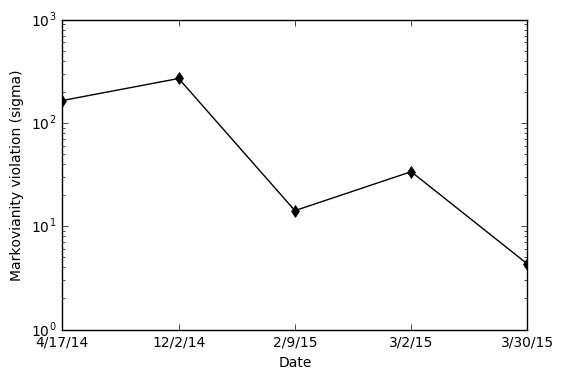

In [16]:
plt.errorbar(range(5),sigmaList,linestyle='-',marker='d',color='k')#,'-o',label='Gi')
plt.yscale('log')
plt.ylabel('Markovianity violation (sigma)')
plt.xlabel('Date')
plt.xticks(range(5),['4/17/14','12/2/14','2/9/15','3/2/15','3/30/15'])
#plt.legend()
plt.savefig('../Figures/Fig2c.pdf')

In [17]:
dates = ['04/17/14','12/02/14','02/09/15','03/02/15','03/30/15']
print "Date\t\tI Infidelity"
for num, key in enumerate(keyList):
    print dates[num], '\t', str(InfidelityIList[num])+' +/- '+str(InfidelityErrorIList[num])

Date		I Infidelity
04/17/14 	0.0023596712239 +/- 7.08746730026e-05
12/02/14 	0.00283605128655 +/- 0.000100532945927
02/09/15 	0.000189232794338 +/- 1.78571254144e-05
03/02/15 	0.000344621943215 +/- 1.44706209459e-05
03/30/15 	6.94495463569e-05 +/- 6.00541603976e-06


In [18]:
print "Date\t\tX Infidelity"
for num, key in enumerate(keyList):
    print dates[num], '\t', str(InfidelityXList[num])+' +/- '+str(InfidelityErrorXList[num])

Date		X Infidelity
04/17/14 	0.00096725735772 +/- 2.68949352519e-05
12/02/14 	0.000315872177792 +/- 3.26452544823e-05
02/09/15 	3.85610861036e-05 +/- 2.19658765727e-05
03/02/15 	4.01005603412e-05 +/- 6.41391332319e-06
03/30/15 	6.13197070332e-05 +/- 7.41281872682e-06


In [19]:
print "Date\t\tY Infidelity"
for num, key in enumerate(keyList):
    print dates[num], '\t', str(InfidelityYList[num])+' +/- '+str(InfidelityErrorYList[num])

Date		Y Infidelity
04/17/14 	0.000995416554978 +/- 2.70147845444e-05
12/02/14 	6.29338560751e-05 +/- 1.84677681803e-05
02/09/15 	7.80493071978e-05 +/- 2.02855136686e-05
03/02/15 	6.54418482664e-05 +/- 7.36198864598e-06
03/30/15 	7.15247680837e-05 +/- 6.93216340687e-06


In [20]:
print "Date\t\tI Diamond distance"
for num, key in enumerate(keyList):
    print dates[num], '\t', str(DiamondIList[num])+' +/- '+str(DiamondErrorIList[num])

Date		I Diamond distance
04/17/14 	0.0213360091963 +/- 0.000179801313819
12/02/14 	0.0382437111865 +/- 0.000381631547723
02/09/15 	0.00560365172972 +/- 5.49061659816e-05
03/02/15 	0.00565151756544 +/- 6.65354059159e-05
03/30/15 	0.000158286518617 +/- 7.32022384325e-06


In [21]:
print "Date\t\tX Diamond distance"
for num, key in enumerate(keyList):
    print dates[num], '\t', str(DiamondXList[num])+' +/- '+str(DiamondErrorXList[num])

Date		X Diamond distance
04/17/14 	0.0108260824177 +/- 0.000624264961791
12/02/14 	0.00330595488009 +/- 8.53405017792e-05
02/09/15 	0.00415745862698 +/- 5.17757549323e-05
03/02/15 	0.000169278666816 +/- 2.36120993871e-05
03/30/15 	0.000139861531393 +/- 1.10848160449e-05


In [22]:
print "Date\t\tY Diamond distance"
for num, key in enumerate(keyList):
    print dates[num], '\t', str(DiamondYList[num])+' +/- '+str(DiamondErrorYList[num])

Date		Y Diamond distance
04/17/14 	0.010487328468 +/- 0.000604468864455
12/02/14 	0.00395331013901 +/- 7.38766904448e-05
02/09/15 	0.00434941134741 +/- 4.78157591345e-05
03/02/15 	0.000185377490904 +/- 1.75722130612e-05
03/30/15 	0.00016192289128 +/- 1.28016548124e-05


In [23]:
print "Date\t\tMarkovianity violation (number of sigma)"
for num, key in enumerate(keyList):
    print dates[num], '\t', sigmaList[num]

Date		Markovianity violation (number of sigma)
04/17/14 	164.483168663
12/02/14 	268.566818317
02/09/15 	14.1366151582
03/02/15 	33.6611279017
03/30/15 	4.30761252171
